In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

Saving Microsoft.xlsx to Microsoft (1).xlsx


In [3]:
df = pd.read_excel("Microsoft.xlsx")
df.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-02,39.998703,40.563270,39.810516,39.913164,27913900
1,2015-01-05,39.630882,39.973042,39.562448,39.665096,39673900
2,2015-01-06,39.049198,39.990141,38.955103,39.673643,36447900
3,2015-01-07,39.545338,39.742080,38.912340,39.331487,29114100
4,2015-01-08,40.708691,40.845555,39.964490,39.990151,29645200


In [4]:
print(df.columns)
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df['ds'] = pd.to_datetime(df['ds'])
df.dropna(inplace=True)
df.info()

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623 entries, 0 to 2622
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2623 non-null   datetime64[ns]
 1   y       2623 non-null   float64       
 2   High    2623 non-null   float64       
 3   Low     2623 non-null   float64       
 4   Open    2623 non-null   float64       
 5   Volume  2623 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 123.1 KB


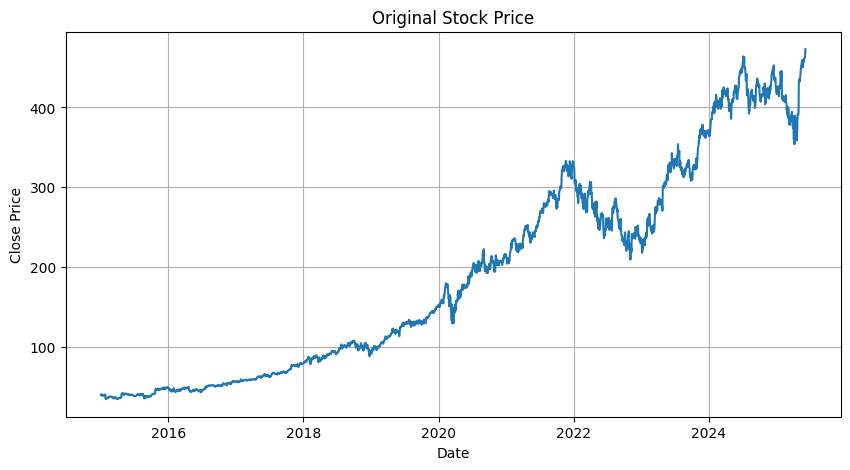

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df['ds'], df['y'])
plt.title('Original Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [6]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpirvjq92s/ycbwjkpf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpirvjq92s/asdnz45z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29200', 'data', 'file=/tmp/tmpirvjq92s/ycbwjkpf.json', 'init=/tmp/tmpirvjq92s/asdnz45z.json', 'output', 'file=/tmp/tmpirvjq92s/prophet_modeloo6vi056/prophet_model-20250619125558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:55:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:55:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [7]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

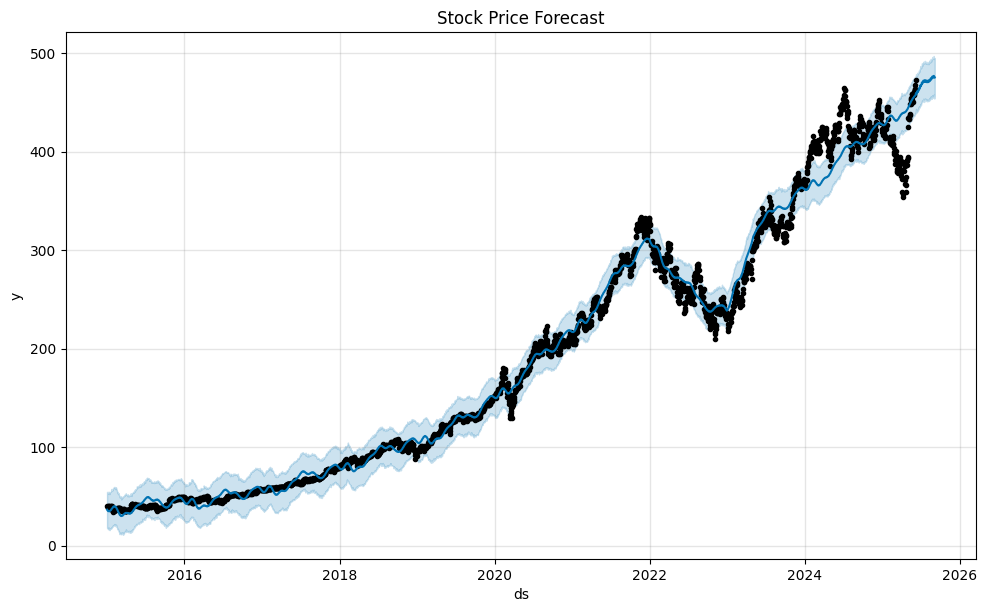

In [8]:
fig1 = model.plot(forecast)
plt.title("Stock Price Forecast")
plt.show()

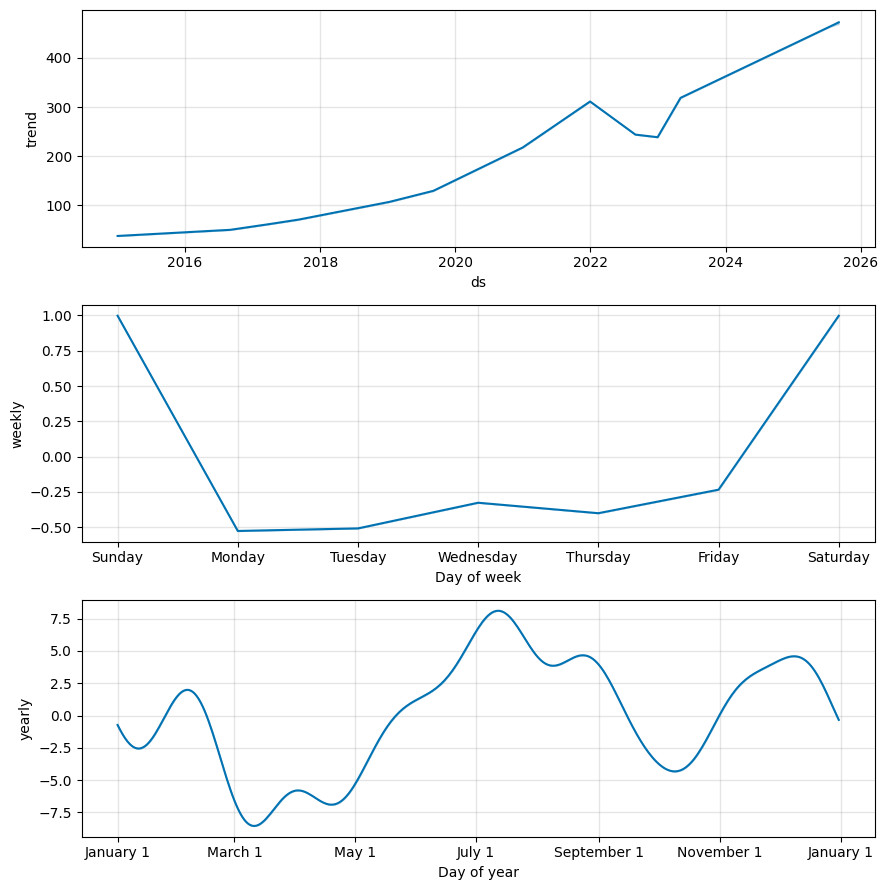

In [9]:
fig2 = model.plot_components(forecast)
plt.show()

In [10]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('prophet_forecast_output.csv', index=False)
